Welcome to the **Mocking Objects lab**. 

Mocking is a process for creating objects that mimic the behavior of real objects. 
* It can be very useful when your code calls another system that it depends on which might not be available during testing. 
* Mocking is critical for making sure that you are only testing your code, not someone else system.

In this lab:
* You are going to use both patching and mocking to mock the real calls to the Internet Movie Database (IMDb) service during testing. 
* You are also going to use test fixtures to provide valid responses that you would have gotten back from the IMDb service had you really called it. * In this way, you can control what is returned from the service without ever actually calling to it.

# Learning Objectives

After completing this lab, you will be able to:
* Load mock responses from real APIs by using test fixtures
* Use the patch decorator during testing
* Mimic the behavior of other objects by using the Mock class
* Write test cases that patch and mock returned objects using test fixture data


# Set Up the Lab Environment

## Clone the Code Repo

Now get the code that you need to test. 

To do this, use the `git clone` command to clone the git repository: `git clone https://github.com/ibm-developer-skills-network/duwjx-tdd_bdd_PracticeCode.git`



## Change into the Lab Folder

Once you have cloned the repository, change to the lab directory: `cd duwjx-tdd_bdd_PracticeCode/labs/06_mocking_objects`

## Install Python Dependencies

The final preparation step is to use `pip` to install the python packages needed for the lab:

```
python3.8 -m pip install -r requirements.txt
```

You are now ready to start the lab.

# Navigate to the Code

In the IDE on the right of your screen, navigate to the `duwjx-tdd_bdd_PracticeCode/labs/06_mocking_objects` folder. 

This folder contains all of the source code that you will use for this lab.

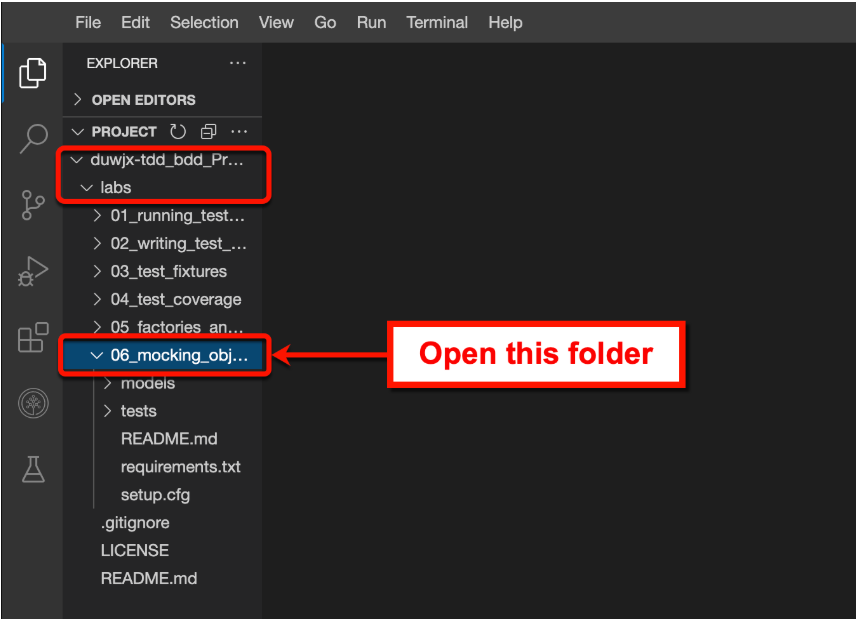

# Establishing Test Fixtures

* In the `tests/fixtures/` folder you will find a file called `imdb_responses.json`. 
* This file was created by calling the IMDb API and recording the responses that came back.
* Each response was given a name and placed into a json file to be loaded during test.
* In addition, a few responses were copied and then modified to simulate good and bad responses. 
* Hopefully you can see how powerful it is that you can control what is returned under test conditions. 
* You can make the responses do anything you want.

Open the **`tests/fixtures/imdb_responses.json`** file in the IDE to familiarize yourself with the various responses that you will use in the tests.

```
{
    "GOOD_SEARCH": {
        "searchType": "Title",
        "expression": "Bambi",
        "results": [{"id": "tt1375666", "resultType": "Movie", "image": null, "title": "Babmi", "description": "Disney movie about a baby dear"}],
        "errorMessage": null
    },
    "INVALID_API": {
        "searchType": "Title",
        "expression": "Bambi",
        "results": null,
        "errorMessage": "Invalid API Key"
    },
    "MOVIE_INVALID": {
        "imDbId": null,
        "title": null,
        "fullTitle": null,
        "type": null,
        "year": null,
        "items": null,
        "errorMessage": "Invalid request."
    },
    "GOOD_REVIEW": {
        "imDbId": "tt1375666",
        "title": "Bambi",
        "fullTitle": "Bambi",
        "type": "Movie",
        "year": "1942",
        "items": [{"username": "mickey","userUrl": null,"reviewLink": null,"warningSpoilers": true,"date": "2008-04-01","rate": "5","helpful": null,"title": "Tear jerker","content": "This movie will make you cry"}],
        "errorMessage": null
    },
    "GOOD_RATING": {
        "imDbId": "tt1375666",
        "title": "Bambi",
        "fullTitle": "Bambi",
        "type": "Movie",
        "year": "1942",
        "imDb": 5,
        "metacritic": 4,
        "theMovieDb": 4,
        "rottenTomatoes": 5,
        "filmAffinity": 3,
        "errorMessage": null
    }
}

```

# The Test Cases

In the `tests/` folder you will find a file called `test_imdb.py`. 

This is the file that you will add to your test cases to test the `IMDb` class.

Open the `tests/test_imdb.py` file in the IDE editor. 

You will work in this file for the remainder of the lab.

# Step 1: Test Search by Title

You will start by implementing a test case for **search by title**. 

Below is the test method that currently implements search by title **without any patching or mocking**.

## Initial Code

Copy and paste this code into `test_imdb.py` as the first test but don’t run it yet. 

Remember to indent properly:

```
    def test_search_by_title(self):
        """Test searching by title"""
        imdb = IMDb("k_12345678")
        results = imdb.search_titles("Bambi")
        self.assertIsNotNone(results)
        self.assertIsNone(results["errorMessage"])
        self.assertIsNotNone(results["results"])
        self.assertEqual(results["results"][0]["id"], "tt1375666")
```

> * *Notice this code instantiates an IMDb object initializing it with an API key.*
> * *Then the code calls **imdb.search_titles()** for the movie “**Bambi**” and asserts that the results are not `None`.*
> * *It also checks that the error message is empty and that the `id` returned is **tt1375666**.*

If you had a real IMDb API key, this code would call the IMDb service and return a response. 

But you don’t want to use up your allocation of API calls on testing, so you will patch this method to not call the `imdb.search_titles()` at all.

## Your Task

You want to patch the `search_titles()` method of the `IMDb` class (i.e. `IMDb.search_titles()`) so that it is not called at all. For this, you will use the `@patch()` decorator and patch the `return_value` to return the `GOOD_SEARCH` test fixture data.

**1.** In `test_imdb.py`, add the following line of code before the `test_search_by_title(self)` method and add a parameter for the new mock called `imdb_mock`.

```
    @patch('test_imdb.IMDb.search_titles')
    def test_search_by_title(self, imdb_mock):
```

> * *Notice that this is **patching** `test_imdb.IMDb.search_titles`.*
> * *The name of your test module is `test_imdb` and so you should patch the `IMDb` class that you imported, not the one in the `models` package.*
> * *This concept is important to understand.*
> * *You always want to **patch** the function that is within the namespace that you are testing.*
> * *This is why you need to **fully qualify** `IMDb.search_titles` as `test_imdb.IMDb.search_titles`.*

**2.** Next, add this line of code as the first line inside the test method after the docstring and before the call to instantiate the `IMDb` class:
```
    imdb_mock.return_value = IMDB_DATA["GOOD_SEARCH"]
```

> * *Notice that `imdb_mock` is the extra parameter that you added to the method call after using `@patch()`.*
> * *This variable represents the patch that was made.*
> * *You can use `return_value` or `side_effect` on this variable.*
> * *In this case, you are using `return_value` to control what is returned from the patched call.*

Those two changes are enough to not call the `IMDb.search_titles()` method and instead simply return the `GOOD_SEARCH` response.

## Solution (`test_imdb.py`)

```
@patch('test_imdb.IMDb.search_titles')
def test_search_by_title(self, imdb_mock):
    """Test searching by title"""
    imdb_mock.return_value = IMDB_DATA["GOOD_SEARCH"]
    imdb = IMDb("k_12345678")
    results = imdb.search_titles("Bambi")
    self.assertIsNotNone(results)
    self.assertIsNone(results["errorMessage"])
    self.assertIsNotNone(results["results"])
    self.assertEqual(results["results"][0]["id"], "tt1375666")
```

## Run the Tests

Run `nosetests` and make sure the test cases pass.

The results should look like this:

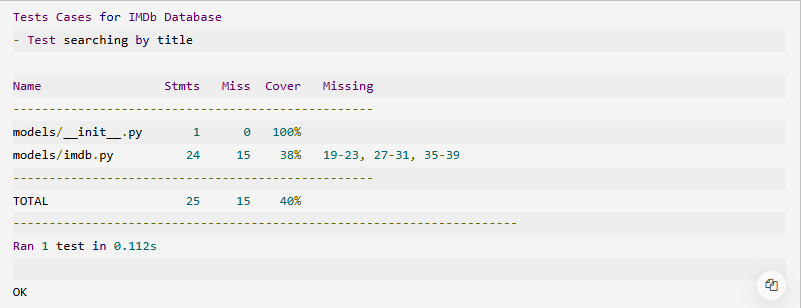

# Step 2: Search with No Result

Now you are going to slowly get more sophisticated in what you patch and mock. 

This next test is a “**sad path**”. 

It will test a call that returns no result.

## Initial Code

Start by cutting and pasting the non-patched version of the `test_search_with_no_results(self)` method into `test_imdb.py`. 

Here is the code to copy:
```
    def test_search_with_no_results(self):
        """Test searching with no results"""
        imdb = IMDb("k_12345678")
        results = imdb.search_titles("Bambi")
        self.assertEqual(results, {})
```

> * *Notice this instantiates a new IMDb instance with an API key.*
> * *Then it calls `imdb.search_titles("Bambi")` and asserts that it sent back an empty dictionary.*
> * *That’s unlikely unless you can get the `IMDb` service to fail… but you can simulate that failure with a mock!*

## Your Task

**1.** In `test_imdb.py`, add the following line of code before the `test_search_with_no_results(self)` method. Then add a parameter for the new mock called `imdb_mock`. The purpose of this code is to patch the call to `requests.get()` so that you can control what comes back using the `imdb_mock` variable.

```
    @patch('models.imdb.requests.get')
    def test_search_with_no_results(self, imdb_mock):
```
> * Notice that this time you are patching a third-party library called requests.
> * But it’s not the requests package that you have imported into your test module.
> * It’s the requests package in the `imdb` module (`models.imdb.requests.get`).
> * Specifically, you are patching the get function because `IMDb.search_titles()` is going to eventually call the `requests.get()` method to make the call to the `IMDb` API.
> * You want to intercept (or patch) that call so that you can control what is returned.

**2.** Next, add this line of code as the first line inside the test method after the docstring and before the call to instantiate the `IMDb` class:
```
    imdb_mock.return_value = Mock(status_code=404)
```
> * *Notice this code patches the `return_value` of the `requests.get()` call with a `Mock` object that has an attribute called `status_code` set to `404`.*
> * *If you search in the source code for `IMDb.search_titles()` you will find that after the call to `requests.get()` is made, it checks that the status_code is `200`.*
> * *If the `status code` isn’t `200`, the code returns an empty dictionary `{}`.*
> * *This is the behavior you want to test.*

Those two changes are enough to cause the `requests.get()` method to not be called and instead, return a `Mock` object with a `status_code` of `404` and send back `{}`.

## Solution (`test_imdb.py`)

```
    @patch('models.imdb.requests.get')
    def test_search_with_no_results(self, imdb_mock):
        """Test searching with no results"""
        imdb_mock.return_value = Mock(status_code=404)
        imdb = IMDb("k_12345678")
        results = imdb.search_titles("Bambi")
        self.assertEqual(results, {})
```

## Run the Tests

Run `nosetests` and make sure the test cases pass.

The results should look like this:

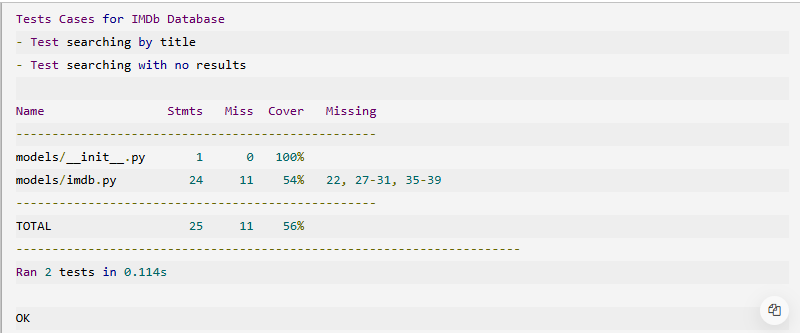

# Step 3: Search by Title Failed

* Next, you will build another failure test case, but this time you need a mock that behaves like a `Response` object from the `requests` package. 
* You will return a good return code of `200` but you are simulating the use of a bad API key so you need a specific error message returned. 
* Luckily, you have one called `INVALID_API` in your test fixture data.

## Initial Code

Start by cutting and pasting the non-patched version of the `test_search_by_title_failed(self)` method into `test_imdb.py`. 

Here is the code to copy:
```
def test_search_by_title_failed(self):
    """Test searching by title failed"""
    imdb = IMDb("bad-key")
    results = imdb.search_titles("Bambi")
    self.assertIsNotNone(results)
    self.assertEqual(results["errorMessage"], "Invalid API Key")
```

> *Notice that this code instantiates a new `IMDb` instance passing in a bad API key.*
> *Then the code calls imdb.search_titles("Bambi") and asserts that it sent back an error message of “**Invalid API Key**”.*

## Your Task

**1.** In `test_imdb.py`, add the following line of code before the `test_search_by_title_failed(self)` method and add a parameter for the new mock called `imdb_mock`. This code represents the patch to the call to `requests.get()`. With it, you can control what comes back using the `imdb_mock` variable.
```
    @patch('models.imdb.requests.get')
    def test_search_by_title_failed(self, imdb_mock):
```

> * *Notice that once again, you are patching the third-party library called requests that is imported by the imdb module in the models package (i.e. `models.imdb.requests.get`).*
> * *Specifically, you are patching the get function because `IMDb.search_titles()` will eventually call the `requests.get()` method to make the call to the `IMDb` API.*
> * *You want to intercept (or patch) that call to control what is returned.*

**2.** You will send back a good return code of `200`. In turn, that return code will cause the `IMDb.search_titles()` method to then call `request.json()` on the returned request. To `search_titles()` into thinking it got back a real `requests.Response`, you must use `spec=Response`,when creating the mock so that it behaves like the real `Response` class.

**3.** Further, you need to mock the `json()` call to return the response that you want: `INVALID_API` from your test fixture data. To accomplish this, you will add one line of code to your test before any other calls.

Next, add this line of code as the first line inside the test method. 

Place it after the **docstring** but before the call to instantiate the `IMDb` class:
```
    imdb_mock.return_value = Mock(
        spec=Response,
        status_code=200,
        json=Mock(return_value=IMDB_DATA["INVALID_API"])
    )
```
> * *Notice that this code patches the return_value of the requests.get() call with a Mock object that has an attribute called status_code set to 200.*
> * *If you search in the source code for IMDb.search_titles() you will find that after the call to requests.get() is made, it checks the status_code.*
> * *If the status code is 200, it then calls request.json() to get the payload.*
> * *This is why you must also mock the call to json() and return the response that you want.*

Those three changes are enough to cause the `requests.get()` method to not be called and instead return a `Mock` object with a `status_code` of `200`. It will also return a `Response.json()` method that will send back the `INVALID_API` response that you have specified when called.

## Solution (`test_imdb.py`)

```
    @patch('models.imdb.requests.get')
    def test_search_by_title_failed(self, imdb_mock):
        """Test searching by title failed"""
        imdb_mock.return_value = Mock(
            spec=Response,
            status_code=200,
            json=Mock(return_value=IMDB_DATA["INVALID_API"])
        )
        imdb = IMDb("bad-key")
        results = imdb.search_titles("Bambi")
        self.assertIsNotNone(results)
        self.assertEqual(results["errorMessage"], "Invalid API Key")
```

## Run the Tests

Run `nosetests` and make sure the test cases pass.

The results should look like this:

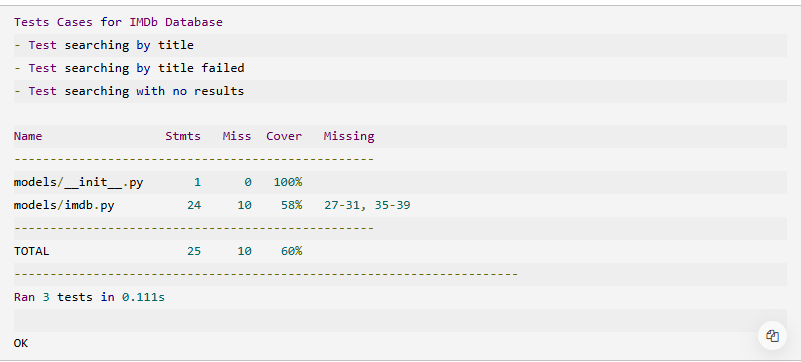

# Step 4: Test Movie Ratings

In this final step, you are going to test the movie ratings call. Since you don’t want to call the real `IMDb` database under test, you will once again mock the `requests.get()` call and substitute your own movie ratings response from your test fixture data.

Hopefully you can see that by patching the remote call, you can test the rest of the function code before and after the call to make sure that it behaves properly under all kinds of test conditions.

## Initial Code

Start by cutting and pasting the non-patched version of the `test_movie_ratings(self)` method into `test_imdb.py`. 

Here is the code to copy:
```
    def test_movie_ratings(self):
        """Test movie Ratings"""
        imdb = IMDb("k_12345678")
        results = imdb.movie_ratings("tt1375666")
        self.assertIsNotNone(results)
        self.assertEqual(results["title"], "Bambi")
        self.assertEqual(results["filmAffinity"], 3)
        self.assertEqual(results["rottenTomatoes"], 5)
```
> * *Notice that this code instantiates a new `IMDb` instance passing in an API key.*
> * *Then it calls `imdb.movie_ratings({id})` passing in a movie `id`.*
> * *Finally, it asserts that the results are not `None` and then it checks some of the ratings to be sure it’s the correct data.*

## Your Task

**1.** In `test_imdb.py`, add the following line of code before the `test_movie_ratings(self)` method and add a parameter for the new mock called `imdb_mock`. This code represents the patch to the call to `requests.get()`. With it, you can control what comes back using the `imdb_mock` variable.
```
    @patch('models.imdb.requests.get')
    def test_movie_ratings(self, imdb_mock):
```
> *Notice that once again, you are patching the third-party library function `requests.get()` and creating a variable called `imdb_mock`. With this variable, you can control how the patch behaves.*

**2.** You are going to send back a good return code of `200`. In turn, this return code will cause the `IMDb.movie_ratings()` method to then call `request.json()` on the returned request. To `movie_ratings()` into thinking it got back a real `requests.Response`, you must use `spec=Response`, when creating the mock so that it behaves like the real `Response` class.

**3.** Yet again, you need to mock the `json()` call to return the response that you want: `GOOD_RATING` from your test fixture data. You will accomplish this by adding one line of code to your test.

Next, add this line of code as the first line inside the test method.

Place it after the docstring but before the call to instantiate the `IMDb` class:
```
    imdb_mock.return_value = Mock(
        spec=Response,
        status_code=200,
        json=Mock(return_value=IMDB_DATA["GOOD_RATING"])
    )
```

> * *Notice this is patching the return_value of the `requests.get()` call with a `Mock` object that has an attribute called `status_code` set to `200`.*
> * *If you search in the source code for `IMDb.movie_ratings()` you will find that after the call to `requests.get()` is made, it checks that the `status_code`.*
> * *If the status code is `200`, it then calls `request.json()` to get the results.*
> * *This is why you must also mock the call to `json()` and return the results that you want.*

Those three changes are enough to cause the `requests.get()` method to not be called and instead return a `Mock` object with a `status_code` of `200`. Then when `Response.json()` is called, it will send back the `GOOD_RATING` response that you have specified.

## Solution(`test_imdb.py`)

```
    @patch('models.imdb.requests.get')
    def test_movie_ratings(self, imdb_mock):
        """Test movie Ratings"""
        imdb_mock.return_value = Mock(
            spec=Response,
            status_code=200,
            json=Mock(return_value=IMDB_DATA["GOOD_RATING"])
        )
        imdb = IMDb("k_12345678")
        results = imdb.movie_ratings("tt1375666")
        self.assertIsNotNone(results)
        self.assertEqual(results["title"], "Bambi")
        self.assertEqual(results["filmAffinity"], 3)
        self.assertEqual(results["rottenTomatoes"], 5)
```

## Run the Tests

Run `nosetests` and make sure the test cases pass.

The results should look like this:

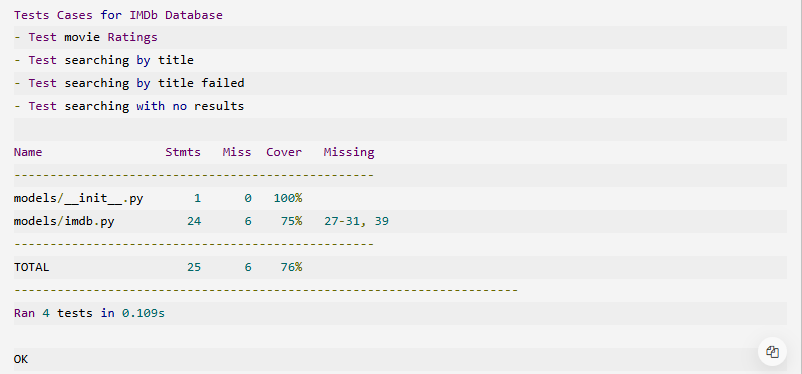

# Conclusion

Congratulations! You just completed the **Mock Objects lab**. 
* Hopefully you now recognize the pattern with mocking.
* First, you use the `@patch()` **decorator** to wrap your test case with a patch.
* Specifically, this patch will change the behavior of a function call that will eventually be called during the test.
* Then, you add a new parameter to the test method call, a parameter representing the patched object.
* Finally, you use that parameter to patch either the `return_value` or `side_effect` that will change the behavior of the patched function.

You also learned how to use mock objects to mimic other classes like the `Response` class. With these mocks, you can control how these classes behave and what they return. You even mocked the `json()` function call on the mocked `Response` class to control what it returned.

You now have the tools to create mock objects and control how they behave and what they return.

Your next challenge is to apply these techniques in your projects to mock out any external dependencies during testing. By doing this, you can ensure that you are testing the behavior of your code, not someone else’s service.